<a href="https://colab.research.google.com/github/PatriciaLucas/CNN/blob/master/Previsao_ETo_CNN_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference evapotranspiration prediction with individual CNN models and CNN ensemble

  


##Inports

In [1]:
# !pip install keras-tcn==2.8.3
# !git clone https://github.com/PatriciaLucas/CNN
# from CNN import Ensemble as es
# from CNN import basic
import Ensemble as es
import basic
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
import warnings
# from google.colab import files
warnings.filterwarnings("ignore")

##Database

In [2]:
def get_search_dataset(dataset):
    df1 = pd.read_csv(dataset, sep=',') # 7305 registros
    series = df1.iloc[:,1]
    train = series[:6939]
    test = series[6939:]
    return train, test

In [3]:
def get_search_dataset_multivariate(dataset, n_var):
    df1 = pd.read_csv(dataset, sep=',') # 7305 registros
    series = df1.iloc[:,1:n_var+1]
    train = series[:6939]
    test = series[6939:]
    return train, test

In [4]:
def form_data(data, t):  
  df = pd.DataFrame(data)
  df1 = df.T
  frames = [df1.iloc[:,0], df1.iloc[:,1], df1.iloc[:,2], df1.iloc[:,3], df1.iloc[:,4]]#, df1.iloc[:,5], df1.iloc[:,6], df1.iloc[:,7], df1.iloc[:,8], df1.iloc[:,9], df1.iloc[:,10], df1.iloc[:,11],
        #  df1.iloc[:,12], df1.iloc[:,13], df1.iloc[:,14], df1.iloc[:,15], df1.iloc[:,16], df1.iloc[:,17],df1.iloc[:,18], df1.iloc[:,19], df1.iloc[:,20], df1.iloc[:,21], df1.iloc[:,22], 
        #  df1.iloc[:,23], df1.iloc[:,24], df1.iloc[:,25], df1.iloc[:,26], df1.iloc[:,27], df1.iloc[:,28], df1.iloc[:,29]]
  result = pd.concat(frames)
  r = pd.DataFrame(result) 
  r.insert(1, "Model", True) 
  for i in range(50):
      r['Model'].iloc[i] = 'CNN'+ t
  return r

In [5]:
star_CNN1 = {'filters': 1, 'pool': 0, 'pool_size': 3, 'dropout': 0.012594059561340142, 'norm': 1, 'lags': 4, 'num_conv': 1, 'kernel_size': 3, 'rmse': 0.7696852129001718, 'num_param': 449}
# star_CNN2 = {'filters': 1, 'dropout': 0, 'norm': 1, 'lags': 4, 'num_conv': 1, 'kernel_size': 0, 'rmse': 0.7566198577347709, 'num_param': 449}
# star_CNN3 = {'pilhas': 2, 'filters': 1, 'dropout': 0.2, 'norm': 1, 'lags': 48, 'num_conv': 3, 'kernel_size': 2, 'rmse': 0.7530, 'num_param': 68257} 

### Univariate CNN1

In [6]:
# train, test = get_search_dataset() 
u_row_train, u_row_test = get_search_dataset('uni_lat-21.95_lon-46.65.csv')

In [7]:
u_results_CNN1 = []
u_train, u_test, u_scaler = es.get_dados(star_CNN1, u_row_train, u_row_test)
X_train, y_train, X_test, y_test = basic.slideWindow(u_train, u_test, star_CNN1['lags'])
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1)
  rmse, yhat, y_test = basic.predictModel(u_test, model, 10, star_CNN1['lags'], scaler=u_scaler)
  u_results_CNN1.append(rmse)

u_results_CNN1 = form_data(u_results_CNN1, '1 (ETo)')
u_results_CNN1.to_csv('u_results_CNN1.csv',index=True)

Epoch 97: early stopping
Epoch 83: early stopping
Epoch 99: early stopping
Epoch 63: early stopping


In [8]:
# u_results_CNN1_1 = []
# u_train, u_test, u_scaler = es.get_dados(star_CNN1, u_row_train, u_row_test)
# X_train, y_train, X_test, y_test = basic.slideWindowMulti(u_train, u_test, star_CNN1['lags'], 1)
# for i in range(5):
#   model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1)
#   rmse, yhat, y_test = basic.predictModelMulti(u_test, model, 10, star_CNN1['lags'], 1, scaler=u_scaler)
#   u_results_CNN1_1.append(rmse)

# u_results_CNN1_1 = form_data(u_results_CNN1_1, '1.1 (ETo)')
# u_results_CNN1_1.to_csv('u_results_CNN1_1.csv',index=True)

### Multivariate CNN1

In [9]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_rs_lat-21.95_lon-46.65.csv', n_var=2)

In [10]:
m_rs_results_CNN1 = []
n_var = 2
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=10, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_rs_results_CNN1.append(rmse)

m_rs_results_CNN1 = form_data(m_rs_results_CNN1, '1 (Rs, ETo)')
m_rs_results_CNN1.to_csv('m_rs_results_CNN1.csv',index=True)

Epoch 54: early stopping
Epoch 46: early stopping
Epoch 30: early stopping


In [11]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_u2_lat-21.95_lon-46.65.csv', n_var=2)

In [12]:
m_u2_results_CNN1 = []
n_var = 2
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=10, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_u2_results_CNN1.append(rmse)

m_u2_results_CNN1 = form_data(m_u2_results_CNN1, '1 (u2, ETo)')
m_u2_results_CNN1.to_csv('m_u2_results_CNN1.csv',index=True)

Epoch 91: early stopping
Epoch 84: early stopping
Epoch 66: early stopping
Epoch 65: early stopping


In [13]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_rh_lat-21.95_lon-46.65.csv', n_var=2)

In [14]:
m_rh_results_CNN1 = []
n_var = 2
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=10, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_rh_results_CNN1.append(rmse)

m_rh_results_CNN1 = form_data(m_rh_results_CNN1, '1 (RH, ETo)')
m_rh_results_CNN1.to_csv('m_rh_results_CNN1.csv',index=True)

Epoch 81: early stopping
Epoch 21: early stopping
Epoch 78: early stopping
Epoch 22: early stopping
Epoch 30: early stopping


In [15]:
m_row_train, m_row_test = get_search_dataset_multivariate('multi_rs_u2_lat-21.95_lon-46.65.csv', n_var=3)

In [16]:
m_rs_u2_results_CNN1 = []
n_var = 3
m_train, m_test, m_scaler = es.get_dados(star_CNN1, m_row_train, m_row_test)
X_train, y_train, X_test, y_test = basic.slideWindowMulti(m_train, m_test, n_lags=star_CNN1['lags'], n_var=n_var)
for i in range(5):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModelMulti(m_test, model, n_previsoes=10, n_lags=star_CNN1['lags'], n_var=n_var, scaler=m_scaler)
  m_rs_u2_results_CNN1.append(rmse)

m_rs_u2_results_CNN1 = form_data(m_rs_u2_results_CNN1, '1 (Rs, u2, ETo)')
m_rs_u2_results_CNN1.to_csv('m_rs_u2_results_CNN1.csv',index=True)

Epoch 73: early stopping
Epoch 63: early stopping
Epoch 82: early stopping


### BoxPlot

Text(0, 0.5, 'RMSE')

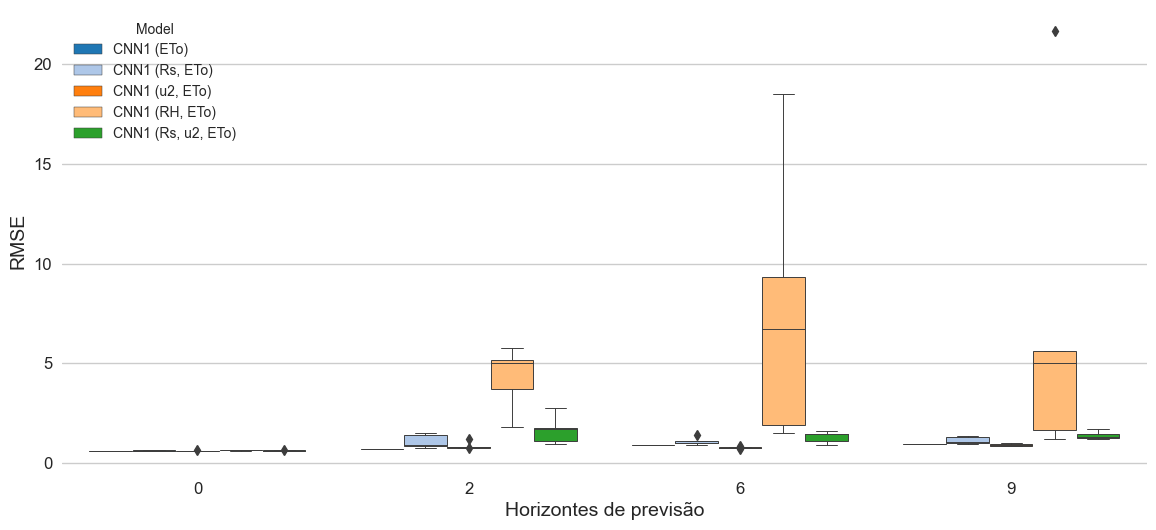

In [19]:
u_CNN1 = pd.read_csv('u_results_CNN1',delimiter=',')
u_CNN1 = u_CNN1[u_CNN1['Unnamed: 0'].isin([0,2,6,9])]

# u_CNN1_1 = pd.read_csv('u_results_CNN1_1',delimiter=',')
# u_CNN1_1 = u_CNN1_1[u_CNN1_1['Unnamed: 0'].isin([0,2,6,9])]

m_rs_CNN1 = pd.read_csv('m_rs_results_CNN1.csv',delimiter=',')
m_rs_CNN1 = m_rs_CNN1[m_rs_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_u2_CNN1 = pd.read_csv('m_u2_results_CNN1.csv',delimiter=',')
m_u2_CNN1 = m_u2_CNN1[m_u2_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_rh_CNN1 = pd.read_csv('m_rh_results_CNN1.csv',delimiter=',')
m_rh_CNN1 = m_rh_CNN1[m_rh_CNN1['Unnamed: 0'].isin([0,2,6,9])]

m_rs_u2_CNN1 = pd.read_csv('m_rs_u2_results_CNN1.csv',delimiter=',')
m_rs_u2_CNN1 = m_rs_u2_CNN1[m_rs_u2_CNN1['Unnamed: 0'].isin([0,2,6,9])]

frames = [u_CNN1, u_CNN1, m_rs_CNN1, m_u2_CNN1, m_rh_CNN1, m_rs_u2_CNN1]
result = pd.concat(frames, ignore_index=True)

plt.style.use('seaborn')
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[14,6], dpi=100)
g1 = sns.boxplot(x=result.iloc[:,0], y=result.iloc[:,1], hue=result.iloc[:,2], data=result, palette="tab20", linewidth=0.7, saturation=1)
plt.tick_params(labelsize=12)
# plt.xticks([1,3,7,10])
plt.xlabel("Horizontes de previsão", fontsize=14)
plt.ylabel("RMSE", fontsize=14)